# Sales Anaylsis

#### import Nessary Libaries

In [8]:
import pandas as pd
import os 

### Task #1 Merging all csv into one

In [18]:


files = [file for file in os.listdir('salesdata/')]
all_month_data = pd.DataFrame()
for file in files:
    df = pd.read_csv('salesdata/'+file)
    all_month_data = pd.concat([all_month_data,df])

all_month_data.to_csv('all_data.csv',index = False)

### Reading Data

In [29]:
all_data = pd.read_csv('all_data.csv')
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


### Task # 2 Cleaning Data

In [50]:
# cleaning NaN Values
all_data = all_data.dropna(how = 'any')


#### find Or and Delete it 

In [47]:
all_data = all_data[all_data['Order ID'].str[:2]!='Or']


#### convert columns into the correct type

In [52]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

## Task #3 Augment data with additional columns

In [48]:
# month clolumn
all_data['Month'] = all_data['Order Date'].str[:2]
all_data['Month'] = all_data['Month'].astype('int32')

In [54]:
# sales column
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']


In [102]:
#using lambda Function
# by regular function

def get_city(address):
    return address.split(',')[1]
def get_state(address):
    return address.split(',')[2].split(' ')[1]


all_data['City'] = all_data['Purchase Address'].apply(lambda x:get_city(x)+' '+get_state(x))

In [103]:
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles CA
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco CA
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco CA
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco CA


### Question # 1 what is best month for sales? how was earned that month?

In [105]:
result_by_month=all_data.groupby('Month').sum()

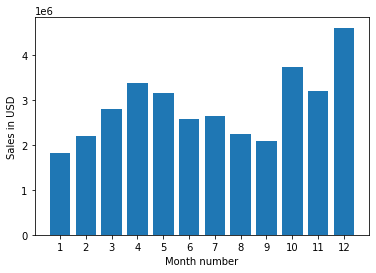

In [106]:
import matplotlib.pyplot as plt
months = range(1,13)
plt.bar(months,result_by_month['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD')
plt.xlabel('Month number')
plt.show()

### Q2: What US city had a highest number of Sales?

In [117]:
result_by_city = all_data.groupby('City').sum()
result_by_city

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta GA,16602,2.779908e+06,104794,2.795499e+06
Austin TX,11153,1.809874e+06,69829,1.819582e+06
Boston MA,22528,3.637410e+06,141112,3.661642e+06
Dallas TX,16730,2.752628e+06,104620,2.767975e+06
Los Angeles CA,33289,5.421435e+06,208325,5.452571e+06
New York City NY,27932,4.635371e+06,175741,4.664317e+06
Portland ME,2750,4.471893e+05,17144,4.497583e+05
Portland OR,11303,1.860558e+06,70621,1.870732e+06
San Francisco CA,50239,8.211462e+06,315520,8.262204e+06


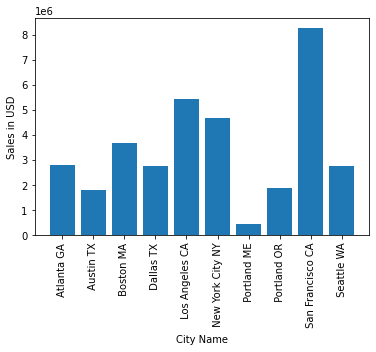

In [122]:
import matplotlib.pyplot as plt
cities = [city for city,df in all_data.groupby('City')]
plt.bar(cities ,result_by_city['Sales'])
plt.xticks(cities ,rotation = 'vertical',size = 10)
plt.ylabel('Sales in USD')
plt.xlabel('City Name')
plt.show()

## Q3 : What time should we display advertisement to maxiumize likehood of customer's buying product?

In [123]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

In [130]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Mintues'] = all_data['Order Date'].dt.minute

In [143]:
result_by_hour = all_data.groupby('Hour').sum()

In [144]:
result_by_hour

,Quantity Ordered,Price Each,Month,Sales,Mintues
Hour,,,,,
0,4428,709296.70,27554,713721.27,103596
1,2619,458490.00,16657,460866.88,61807
2,1398,233833.64,8507,234851.44,32508
3,928,144726.42,5904,145757.89,23044
4,937,162058.18,6148,162661.01,26876
5,1493,229621.21,9301,230679.82,42877
6,2810,445000.11,17539,448113.00,80343
7,4556,740568.11,28850,744854.12,127447
8,7002,1185970.62,43626,1192348.97,198135


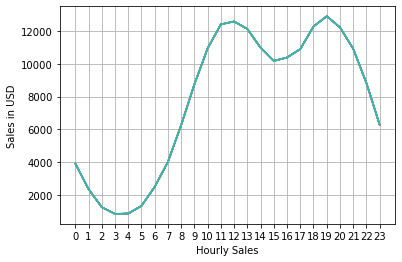

In [150]:
import matplotlib.pyplot as plt
hour = [hour for hour,df in all_data.groupby('Hour')]
plt.plot(hour ,all_data.groupby('Hour').count())
plt.xticks(hour,size = 10)
plt.grid()
plt.ylabel('Sales in USD')
plt.xlabel('Hourly Sales')
plt.show()

## Q4:What product is most often sold togather?

In [175]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x:','.join(x))
df = df[['Order ID','Grouped']].drop_duplicates()

<ipython-input-175-9d0d697be575>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x:','.join(x))


In [176]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))
for key,value in count.most_common(10):
    print(key,value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


## Q:5 What product sold the most? why do you think it sold the most?

In [177]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Mintues
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,9,27


In [182]:
product_grouped = all_data.groupby('Product').sum()

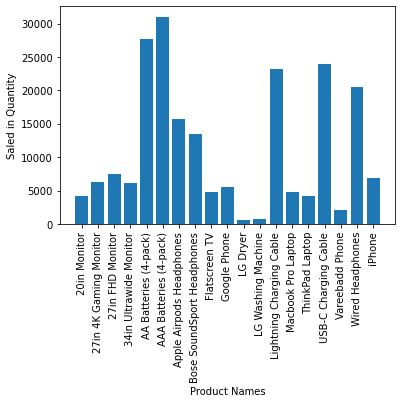

In [190]:
import matplotlib.pyplot as plt
prd = [prd for prd,df in all_data.groupby('Product')]
plt.bar(prd ,product_grouped['Quantity Ordered'])
plt.xticks(prd ,rotation = 'vertical',size = 10)
plt.ylabel('Saled in Quantity')
plt.xlabel('Product Names')
plt.show()

<ipython-input-209-eff7b7e30818>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(prd,rotation='vertical',size=8)


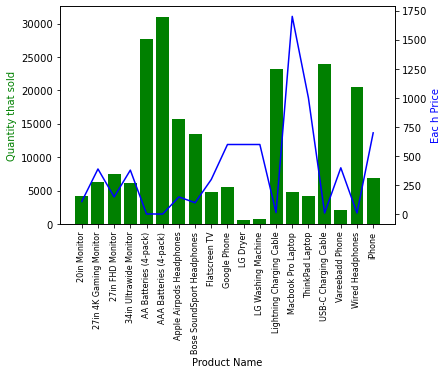

In [209]:
prices = all_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(prd,product_grouped['Quantity Ordered'],color='g')
ax2.plot(prd,prices,color = 'b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity that sold', color='g')
ax2.set_ylabel('Eac h Price', color='b')
ax1.set_xticklabels(prd,rotation='vertical',size=8)

plt.show()